In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

#Fit Logistic Regression Model

In [2]:
url = "/content/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

#Caculate AUC

In [4]:
#use model to predict probability that given y value is 1
y_pred_proba = log_regression.predict_proba(X_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)

0.9461332614006639


#Visualizing with ROC Curve

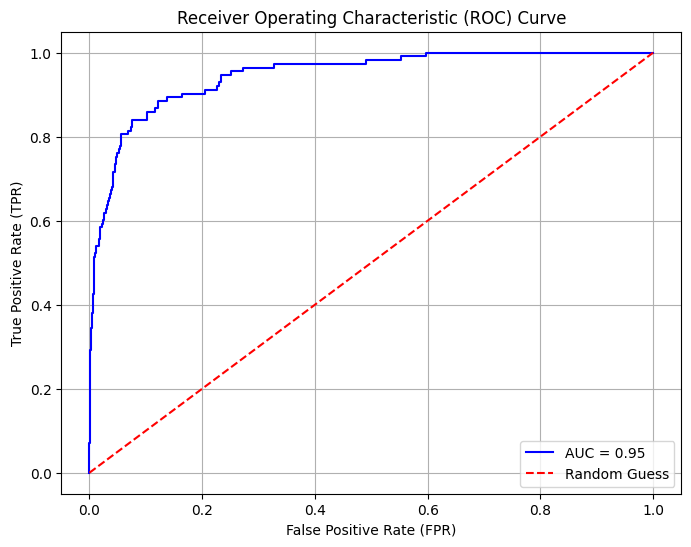

In [7]:
# Generate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Random Guess")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()